# AUTOCORRELAÇÃO EM UMA SÉRIE TEMPORAL

# 0.0 Importações

## 0.1 Bibliotecas

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set()

In [2]:
rcParams['figure.figsize'] = 15,6

# 1.0 Primeiro caso: dados aleatórios normalizados

In [3]:
np.random.seed(6)

dados1 = np.random.normal(0,1,72)
dados1

array([-0.31178367,  0.72900392,  0.21782079, -0.8990918 , -2.48678065,
        0.91325152,  1.12706373, -1.51409323,  1.63929108, -0.4298936 ,
        2.63128056,  0.60182225, -0.33588161,  1.23773784,  0.11112817,
        0.12915125,  0.07612761, -0.15512816,  0.63422534,  0.810655  ,
        0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384,
       -1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953,
       -0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143,
       -0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059,
        1.38503523, -0.51962709, -0.78015214,  0.95560959, -0.12673638,
       -1.36861282,  1.21848065, -0.85750144, -0.56147088, -1.0335199 ,
        0.35877096,  1.07368134, -0.37550472,  0.39636757, -0.47144628,
        2.33660781,  1.50278553, -0.59545972,  0.52834106,  0.9398248 ,
        0.42628539, -0.75815703, -0.16236698,  0.72680996,  0.44408297,
       -0.85682264,  0.44692842, -1.01464799, -2.1323234 ,  0.17

<AxesSubplot:>

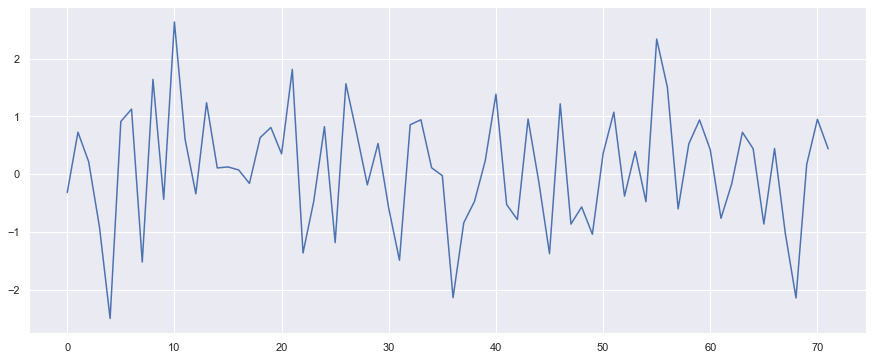

In [4]:
serie = pd.Series(dados1)
serie.plot()

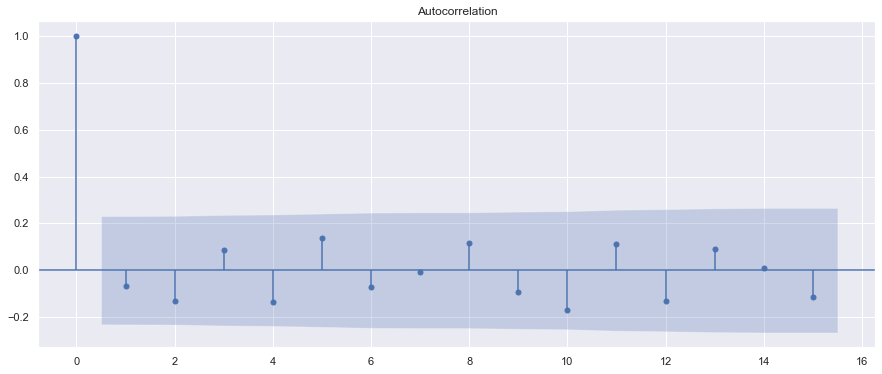

In [5]:
plot_acf(serie, lags=15)
plt.show()

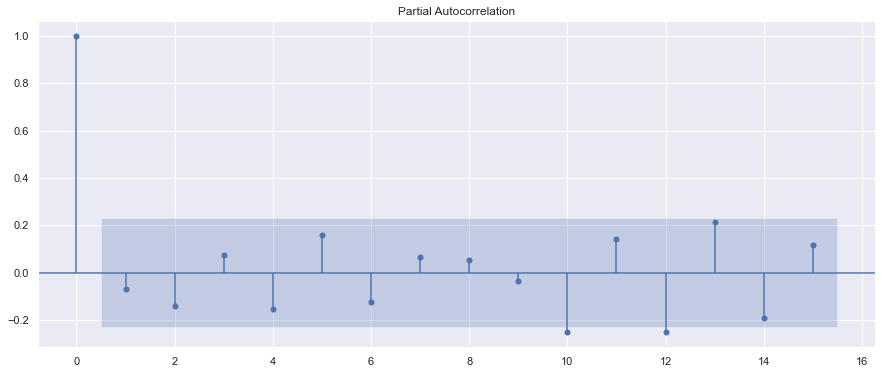

In [6]:
plot_pacf(serie, lags=15)
plt.show()

# 2.0 Segundo caso: dados externos de Manchas Solares

In [7]:
dados2 = pd.read_csv('Data/sunspots.csv')

In [8]:
dados2.columns = ['valores']
dados2 = dados2.reset_index(drop=True)

<AxesSubplot:>

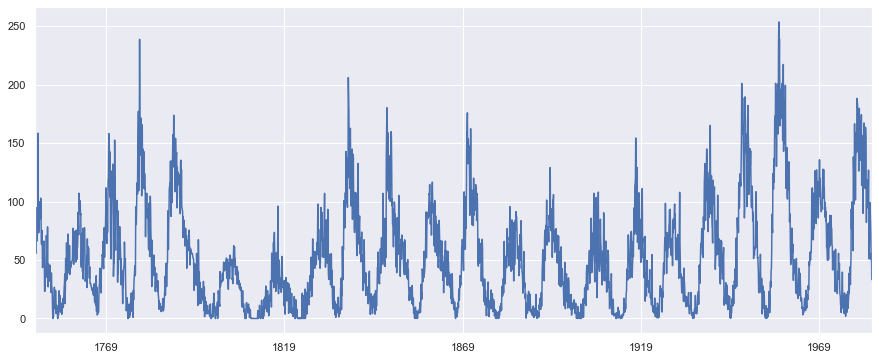

In [9]:
indice = pd.date_range('1749', periods=len(dados2), freq='M')
serie2 = pd.Series(dados2['valores'].values, index=indice)
serie2.plot()

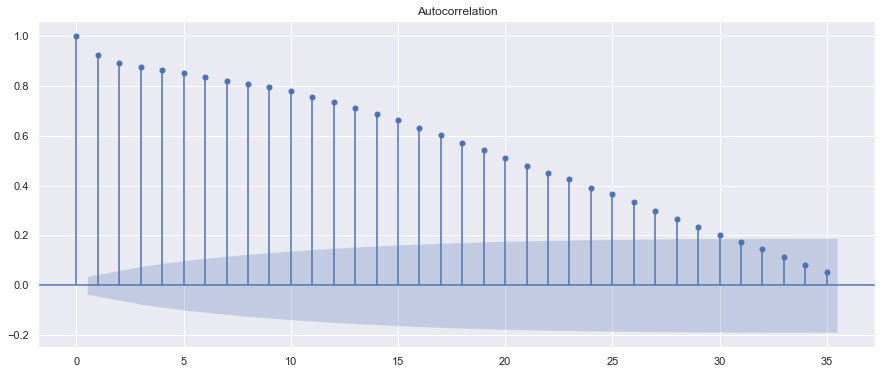

In [10]:
plot_acf(serie2)
plt.show()

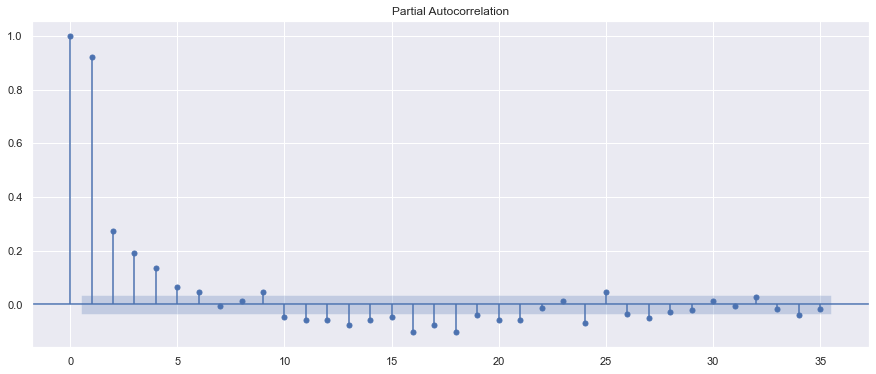

In [11]:
plot_pacf(serie2)
plt.show()

# 3.0 Terceiro caso: dados do Statsmodels sobre Manchas Solares

Dados anuais (1700-2008) sobre manchas solares.

In [14]:
manchas_solares = sm.datasets.sunspots.load_pandas().data
manchas_solares

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [15]:
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index=manchas_solares['YEAR'])
serie3

YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
          ... 
2004.0    40.4
2005.0    29.8
2006.0    15.2
2007.0     7.5
2008.0     2.9
Length: 309, dtype: float64

<AxesSubplot:xlabel='YEAR'>

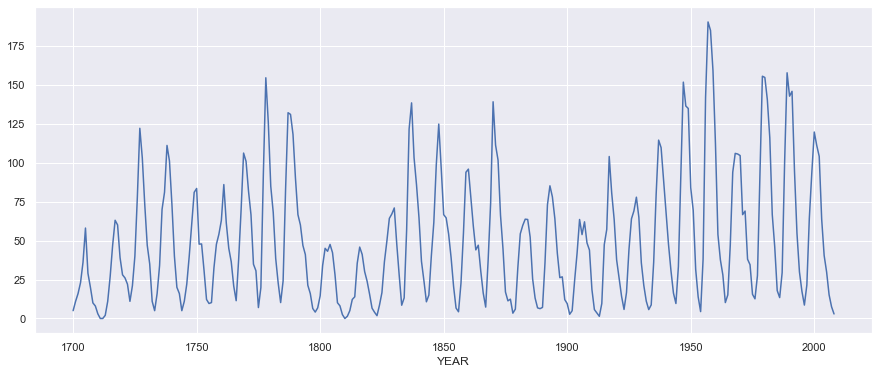

In [16]:
serie3.plot()

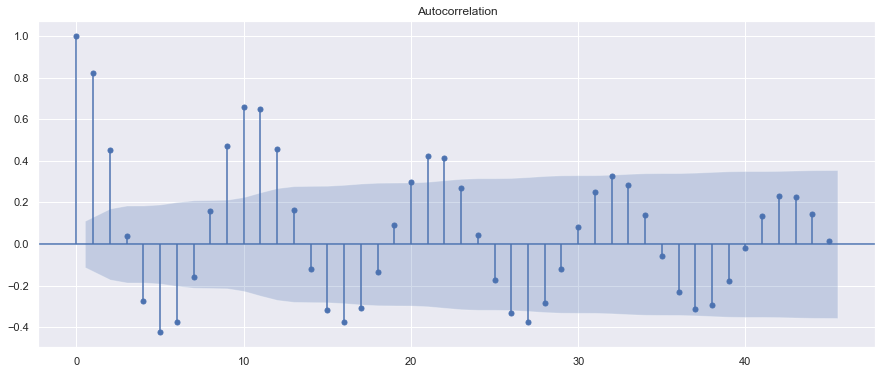

In [18]:
plot_acf(serie3, lags=45)
plt.show()

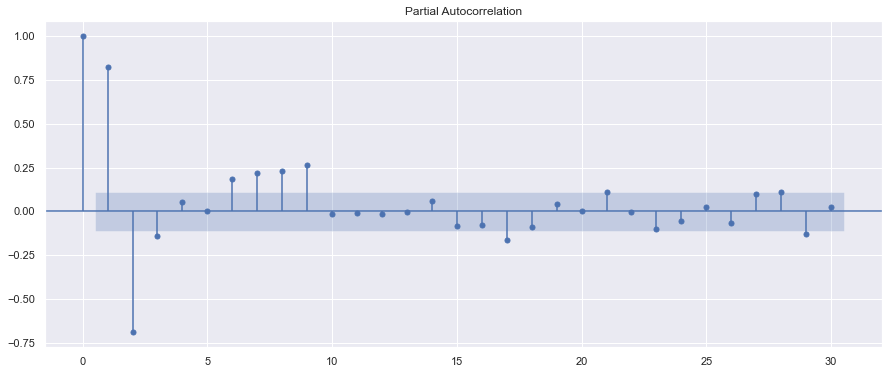

In [21]:
plot_pacf(serie3, lags=30)
plt.show()